# Partially coherent structured modes and their cross--correlation

In this notebook we study optical vortices in the partially coherent regime.  First, we load a set of functions for this task.

In [1]:
include("PartiallyCoherentSimulation.jl")
using Plots
using BenchmarkTools
gr()

┌ Info: Recompiling stale cache file /home/ben/.julia/compiled/v1.0/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1187


Plots.GRBackend()

The number of threads is

In [2]:
Threads.nthreads()

1

We call the function PCsimulationSC (for Small-Core vortex) or PCsimulationLG (for LG beams), where we get as output the intensity and cross--correlation. 

Use these parameters:
- Small--core case w=0.5, wv=0.5, c=0.3...  the size of the numerical window is $2.5w_0$
- Laguerre--Gaussian w=0.5, c=0.5... the size of the numerical window is $4w_0$


## Small-core
We start with the Small-core case:

In [3]:
N=200
Ne=250
w=0.3
wv=1.0
c=0.15
TC=1.5
p=0
pts=128
@time I, XI = PCsimulationSC(N,Ne,w,wv,c,TC,pts);
#@time I, XI = PCsimulationLG(N,Ne,w0=w,circle=c,TopologicalCharge=TC,RadialOrder=p,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIsc=absI/maximum(absI)
absXIsc=absXI/maximum(absXI);

110.752820 seconds (6.54 M allocations: 43.397 GiB, 1.50% gc time)


In [5]:
@code_warntype PCsimulationSC(N,Ne,w,wv,c,TC,pts)

Body::Tuple{Array{Float64,2},Array{Float64,2}}
│╻                  Type17 1 ─── %1   = %new(Core.Box)::Core.Box
│╻                  *   │     %2   = (Base.mul_float)(2.5, w0)::Float64
│╻╷╷╷               /20 │     %3   = (Base.sitofp)(Float64, points)::Float64
││╻                  /   │     %4   = (Base.div_float)(2.0, %3)::Float64
│╻                  -   │     %5   = (Base.neg_int)(points)::Int64
││╻╷╷                float   │     %6   = (Base.sitofp)(Float64, %5)::Float64
││╻                  /   │     %7   = (Base.div_float)(%6, 2.0)::Float64
││╻╷╷                float   │     %8   = (Base.sitofp)(Float64, points)::Float64
││╻                  /   │     %9   = (Base.div_float)(%8, 2.0)::Float64
││╻                  -   │     %10  = (Base.sub_float)(%9, 1.0)::Float64
│                     │            invoke Core.kwfunc(Main.range::Any)
│╻                  #range   │     %12  = Base.nothing::Nothing
││╻╷╷╷               isempty   │     %13  = (Base.slt_int)(0, 1)::Bool
│││┃││        

││││││││              │            invoke Random.rand!(%102::Random.MersenneTwister, %116::Random.UnsafeView{Float64}, $(QuoteNode(Random.SamplerTrivial{Random.CloseOpen01{Float64},Float64}(Random.CloseOpen01{Float64}())))::Random.SamplerTrivial{Random.CloseOpen01{Float64},Float64})
││││││││              │            $(Expr(:gc_preserve_end, :(%114)))
││││││││              └────        goto #33
│││││││╻                  Type   32 ── %120 = %new(Core.AssertionError, "sizeof(Float64) * n64 <= sizeof(T) * length(A) && isbitstype(T)")::AssertionError
│││││││               │            (Base.throw)(%120)
│││││││               └────        $(Expr(:unreachable))
││││││                33 ┄─        goto #34
│││││                 34 ──        goto #35
││││                  35 ──        goto #36
│││                   36 ──        goto #37
││                    37 ──        goto #38
││╻╷╷╷╷              instantiate   38 ── %128 = (Base.arraysize)(%103, 1)::Int64
│││┃│││               combine_axes 

│││││││╻                  Type   54 ── %193 = %new(Base.Broadcast.Broadcasted{Nothing,Tuple{Base.OneTo{Int64},Base.OneTo{Int64}},typeof(sqrt),Tuple{Base.Broadcast.Extruded{Array{Float64,2},Tuple{Bool,Bool},Tuple{Int64,Int64}}}}, sqrt, %191, %136)::Base.Broadcast.Broadcasted{Nothing,Tuple{Base.OneTo{Int64},Base.OneTo{Int64}},typeof(sqrt),Tuple{Base.Broadcast.Extruded{Array{Float64,2},Tuple{Bool,Bool},Tuple{Int64,Int64}}}}
││││││                └────        goto #55
│││││╻╷╷╷╷              macro expansion   55 ── %195 = (Base.slt_int)(%134, 1)::Bool
││││││┃                  iterate   └────        goto #57 if not %195
│││││││               56 ──        goto #58
│││││││               57 ──        goto #58
││││││                58 ┄─ %199 = φ (#56 => true, #57 => false)::Bool
││││││                │     %200 = φ (#57 => 1)::Int64
││││││                │     %201 = φ (#57 => 1)::Int64
││││││                │     %202 = (Base.not_int)(%199)::Bool
││││││                └────        goto #80 if

││╻╷                 *   107 ─ %329 = (Base.mul_float)(2.0, 3.141592653589793)::Float64
││╻                  *   │     %330 = invoke Base.broadcast(Base.:*::typeof(*), %329::Float64, %304::Array{Float64,2})::Array{Float64,2}
│╻╷╷╷╷╷             materialize43 │     %331 = (Base.arraysize)(%274, 1)::Int64
││┃││││              instantiate   │     %332 = (Base.arraysize)(%274, 2)::Int64
│││╻╷╷╷               combine_axes   │     %333 = (Base.slt_int)(%331, 0)::Bool
││││┃│││││             broadcast_axes   │     %334 = (Base.ifelse)(%333, 0, %331)::Int64
│││││┃│││               axes   │     %335 = %new(Base.OneTo{Int64}, %334)::Base.OneTo{Int64}
││││││╻╷╷                map   │     %336 = (Base.slt_int)(%332, 0)::Bool
│││││││┃││                Type   │     %337 = (Base.ifelse)(%336, 0, %332)::Int64
││││││││┃                  Type   │     %338 = %new(Base.OneTo{Int64}, %337)::Base.OneTo{Int64}
│││││╻╷╷╷╷╷╷            broadcast_axes   │     %339 = (Base.arraysize)(%302, 1)::Int64
││││││┃│││││ 

││││││╻╷╷╷               map   │     %409 = (Base.slt_int)(%407, 0)::Bool
│││││││┃││                Type   │     %410 = (Base.ifelse)(%409, 0, %407)::Int64
││││││││╻╷╷                Type   │     %411 = (Base.slt_int)(%408, 0)::Bool
│││││││││┃                  max   │     %412 = (Base.ifelse)(%411, 0, %408)::Int64
││││││╻╷╷                _eq   │     %413 = (%410 === %369)::Bool
│││││││╻                  ==   │     %414 = (Base.and_int)(true, %413)::Bool
││││││╻                  _eq   │     %415 = (%414 === false)::Bool
│││││││               └────        goto #136 if not %415
│││││││               135 ─        goto #140
│││││││╻╷╷                _eq   136 ─ %418 = (%412 === %395)::Bool
││││││││╻                  ==   │     %419 = (Base.and_int)(true, %418)::Bool
│││││││╻                  _eq   │     %420 = (%419 === false)::Bool
││││││││              └────        goto #138 if not %420
││││││││              137 ─        goto #139
││││││││              138 ─        goto #139
│││││││     

│││││││││││││││┃│││               map   │     %480 = (Base.ifelse)(%479, 0, %477)::Int64
││││││││││││││││╻╷╷                Type   │     %481 = (Base.slt_int)(%478, 0)::Bool
│││││││││││││││││┃│                 Type   │     %482 = (Base.ifelse)(%481, 0, %478)::Int64
││││││││││││││╻╷╷╷               _newindexer   │     %483 = (%482 === 1)::Bool
│││││││││││││││╻                  _newindexer   │     %484 = (Base.not_int)(%483)::Bool
│││││││││││││││╻╷                 !=   │     %485 = (%480 === 1)::Bool
││││││││││││││││╻                  !   │     %486 = (Base.not_int)(%485)::Bool
│││││││││││││││       │     %487 = (Core.tuple)(%486, %484)::Tuple{Bool,Bool}
│││││││││││││││       │     %488 = (Core.tuple)(1, 1)::Tuple{Int64,Int64}
│││││││││││││╻                  Type   │     %489 = %new(Base.Broadcast.Extruded{Array{Float64,2},Tuple{Bool,Bool},Tuple{Int64,Int64}}, %476, %487, %488)::Base.Broadcast.Extruded{Array{Float64,2},Tuple{Bool,Bool},Tuple{Int64,Int64}}
│││││││││││           └────     

│││││││││╻╷                 _broadcast_getindex_evalf   │     %543 = (Base.mul_float)(%538, %542)::Float64
││││││││              └────        goto #174
││││││││╻                  setindex!   174 ─        (Base.arrayset)(false, %406, %543, %517, %509)
│││││││╻                  +   │     %546 = (Base.add_int)(%514, 1)::Int64
│││││╻                  macro expansion   │            $(Expr(:simdloop, false))
││││││                └────        goto #167
│                     175 ─        nothing
││││││╻╷╷                iterate   176 ─ %550 = (Base.add_int)(%510, 1)::Int64
│││││││╻╷                 >   │     %551 = (Base.slt_int)(%398, %550)::Bool
│││││││               └────        goto #178 if not %551
│││││││               177 ─        goto #179
│││││││               178 ─        goto #179
││││││                179 ┄ %555 = φ (#178 => %550)::Int64
││││││                │     %556 = φ (#178 => %550)::Int64
││││││                │     %557 = φ (#177 => true, #178 => false)::Bool
││││││       

││││││││              └────        goto #202 if not %624
││││││││              201 ─        goto #208
│││││││││╻╷                 ==   202 ─ %627 = (%582 === %590)::Bool
││││││││││╻                  &   │     %628 = (Base.and_int)(true, %627)::Bool
│││││││││             └────        goto #204 if not %628
│││││││││             203 ─        goto #205
│││││││││╻                  ==   204 ─ %631 = (%590 === 1)::Bool
│││││││││             └────        goto #205
││││││││              205 ┄ %633 = φ (#203 => %628, #204 => %631)::Bool
││││││││              └────        goto #207 if not %633
││││││││              206 ─        goto #208
││││││││╻                  Type   207 ─ %636 = %new(Base.DimensionMismatch, "arrays could not be broadcast to a common size")::DimensionMismatch
││││││││              │            (Base.Broadcast.throw)(%636)
││││││││              └────        $(Expr(:unreachable))
│││││││               208 ┄ %639 = φ (#201 => %590, #206 => %582)::Int64
│││││││               │   

││││││││││││          │     %702 = (Core.tuple)(1, 1)::Tuple{Int64,Int64}
││││││││││╻                  Type   │     %703 = %new(Base.Broadcast.Extruded{Array{Float64,2},Tuple{Bool,Bool},Tuple{Int64,Int64}}, %690, %701, %702)::Base.Broadcast.Extruded{Array{Float64,2},Tuple{Bool,Bool},Tuple{Int64,Int64}}
││││││││              └────        goto #228
││││││││╻╷╷╷               preprocess   228 ─ %705 = (%651 === %302)::Bool
│││││││││┃││                preprocess_args   └────        goto #230 if not %705
││││││││││┃│                 preprocess   229 ─        goto #234
│││││││││││┃│╷╷╷╷             broadcast_unalias   230 ─ %708 = $(Expr(:foreigncall, :(:jl_array_ptr), Ptr{Float64}, svec(Any), :(:ccall), 1, :(%651)))::Ptr{Float64}
││││││││││││╻                  unalias   │     %709 = (Core.bitcast)(Core.UInt, %708)::UInt64
│││││││││││││╻╷                 mightalias   │     %710 = $(Expr(:foreigncall, :(:jl_array_ptr), Ptr{Float64}, svec(Any), :(:ccall), 1, :(%302)))::Ptr{Float64}
│││││││││││

│││││││┃│╷╷╷╷             getindex   248 ─ %766 = (Base.sle_int)(1, %762)::Bool
││││││││┃││││              checkbounds   │     %767 = (Base.sle_int)(%762, %616)::Bool
│││││││││╻                  checkbounds_indices   │     %768 = (Base.and_int)(%766, %767)::Bool
││││││││││╻╷                 checkbounds_indices   │     %769 = (Base.sle_int)(1, %754)::Bool
│││││││││││┃││                checkbounds_indices   │     %770 = (Base.sle_int)(%754, %642)::Bool
││││││││││││╻                  checkindex   │     %771 = (Base.and_int)(%769, %770)::Bool
││││││││││││╻                  &   │     %772 = (Base.and_int)(%771, true)::Bool
│││││││││││╻                  &   │     %773 = (Base.and_int)(%768, %772)::Bool
│││││││││             └────        goto #250 if not %773
│││││││││             249 ─        goto #251
│││││││││             250 ─ %776 = Base.throw_boundserror::typeof(Base.throw_boundserror)
│││││││││             │     %777 = (Core.tuple)(%764)::Tuple{CartesianIndex{2}}
│││││││││             

││                    │     %852 = (%846)(Main.abs2, %851)::Base.Broadcast.Broadcasted{_1,Nothing,typeof(abs2),_2} where _2 where _1
││                    │     %853 = (%845)(%852)::Any
││                    │     %854 = Base.Broadcast.materialize::Core.Compiler.Const(Base.Broadcast.materialize, false)
││                    │     %855 = Base.Broadcast.broadcasted::Core.Compiler.Const(Base.Broadcast.broadcasted, false)
││                    │     %856 = (Core.isdefined)(%97, :contents)::Bool
││                    └────        goto #276 if not %856
││                    275 ─        goto #277
││                    276 ─        $(Expr(:throw_undef_if_not, :U, false))
││                    277 ┄ %860 = (Core.getfield)(%97, :contents)::Any
││                    │     %861 = (Core.isdefined)(%97, :contents)::Bool
││                    └────        goto #279 if not %861
││                    278 ─        goto #280
││                    279 ─        $(Expr(:throw_undef_if_not, :U, false))
││  

In [6]:
#@benchmark PCsimulationSC(N,Ne,w,wv,c,TC,pts)

BenchmarkTools.Trial: 
  memory estimate:  21.63 GiB
  allocs estimate:  370417
  --------------
  minimum time:     17.004 s (9.13% GC)
  median time:      17.004 s (9.13% GC)
  mean time:        17.004 s (9.13% GC)
  maximum time:     17.004 s (9.13% GC)
  --------------
  samples:          1
  evals/sample:     1

Now, we plot the intensity and cross--correlation for the Small--core case:

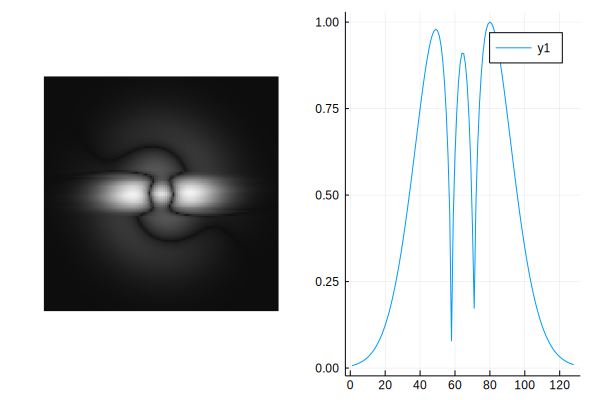

In [4]:
# UNCOMMENT IF USING "GASTON"
#set(palette="gray")
#imagesc([absI' absXI'],gpcom="set size ratio -1; unset tics; unset colorbox")\
p1=heatmap(sqrt.(absXIsc)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot(sqrt.(absXIsc[:,div(end,2)+1]))
plot(p1, p2, layout=(1,2))

## Laguerre-Gaussian 
Then, we compute the Laguerre--Gaussian case:

In [26]:
N=250
Ne=250
w=0.5
wv=0.5
c=0.5
TC=2
p=0
pts=100
#@time I, XI = PCsimulationSC(N,Ne,w0=w,wV=wv,circle=c,TopologicalCharge=TC,points=pts);
@time I, XI = PCsimulationLG(N,Ne,w0=w,circle=c,TopologicalCharge=TC,RadialOrder=p,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIlg1=absI/maximum(absI)
absXIlg1=absXI/maximum(absXI);

 96.989555 seconds (1.73 M allocations: 32.895 GiB, 2.29% gc time)


Then, we plot the partially coherent LG case

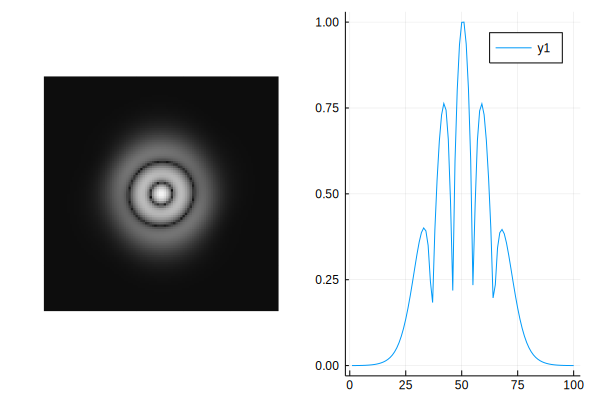

In [27]:
p1=heatmap(sqrt.(absXIlg1)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot(sqrt.(absXIlg1[:,div(end,2)+1]))
plot(p1, p2, layout=(1,2))

Another case, for $l=0$ and the radial index $p\ne 0$

In [10]:
N=50
Ne=200
w=0.5
wv=0.5
c=0.4
TC=0
p=3
pts=128
#@time I, XI = PCsimulationSC(N,Ne,w0=w,wV=wv,circle=c,TopologicalCharge=TC,points=pts);
@time I, XI = PCsimulationLG(N,Ne,w0=w,circle=c,TopologicalCharge=TC,RadialOrder=p,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIlg=absI/maximum(absI)
absXIlg=absXI/maximum(absXI);

 14.855411 seconds (153.03 k allocations: 8.819 GiB, 11.81% gc time)


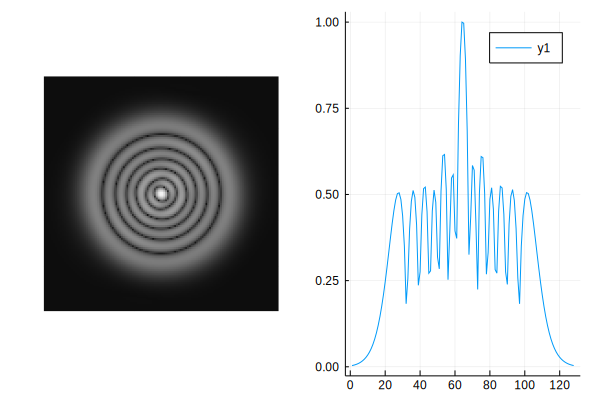

In [19]:
p1=heatmap(sqrt.(absXIlg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot(sqrt.(absXIlg[:,div(end,2)+1]))
plot(p1, p2, layout=(1,2))

## Hermite-Gaussian
The following commands compute the Hermite--Gaussian partially coherent case

In [5]:
N=1
Ne=1
w=1.2
wv=0.5
c=0.001*w
mm=4    # x-direction
nn=4    # y-direction
pts=128
@time I, XI = PCsimulationHG(N,Ne,w0=w,circle=c,m=mm,n=nn,points=pts);
absI=abs.(I)
absXI=abs.(XI)
absIhg=absI/maximum(absI)
absXIhg=absXI/maximum(absXI);

  0.317250 seconds (677.47 k allocations: 35.409 MiB, 8.90% gc time)


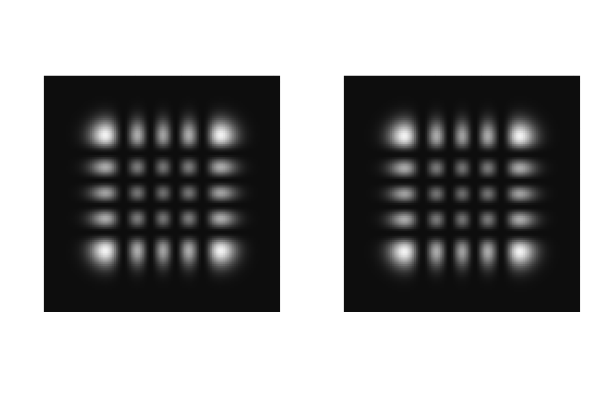

In [6]:
p1=heatmap((absIhg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIhg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

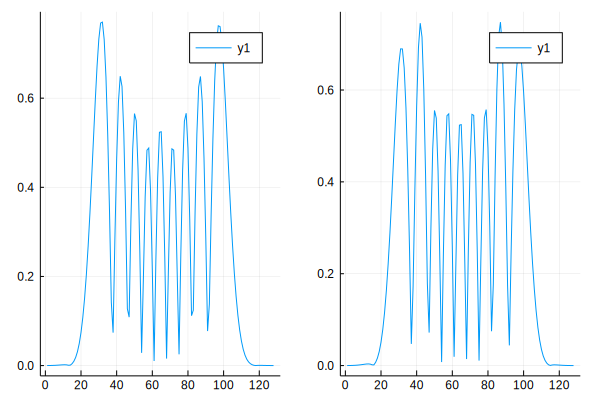

In [25]:
p1=heatmap((absXIhg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=plot((absXIhg[:,div(end,2)+1]))
p3=plot((absXIhg[div(end,2)+1,:]))
plot(p2, p3, layout=(1,2))

## Ince-Gaussian

Now, we study Ince-Gaussian beams

In [101]:
N=100
Ne=100
w=1.0
c=0.9*w
p=4    # x-direction
m=0    # y-direction
q=2.
parity=0
pts=96
@time I, XI = PCsimulationIGsc(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI);

 66.998689 seconds (645.33 M allocations: 66.008 GiB, 19.10% gc time)


In [100]:
@benchmark PCsimulationIG(10,1,w,c,p,m,q,parity,pts)

BenchmarkTools.Trial: 
  memory estimate:  69.07 MiB
  allocs estimate:  645482
  --------------
  minimum time:     66.326 ms (18.36% GC)
  median time:      66.725 ms (18.24% GC)
  mean time:        68.603 ms (20.38% GC)
  maximum time:     156.160 ms (64.04% GC)
  --------------
  samples:          73
  evals/sample:     1

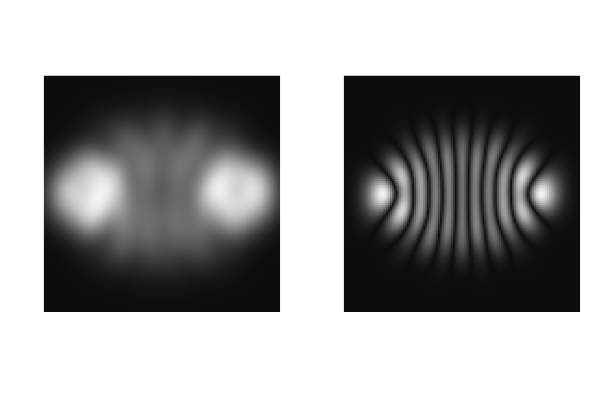

In [42]:
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))

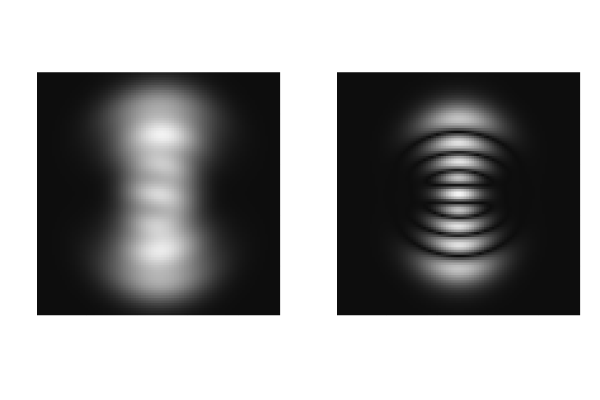

In [61]:
p3=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p4=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p3, p4, layout=(1,2))

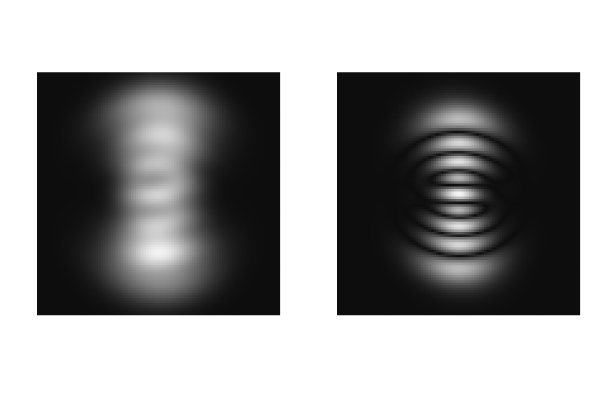

In [37]:
p3=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p4=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p3, p4, layout=(1,2))

172.589985 seconds (2.03 G allocations: 186.994 GiB, 21.74% gc time)


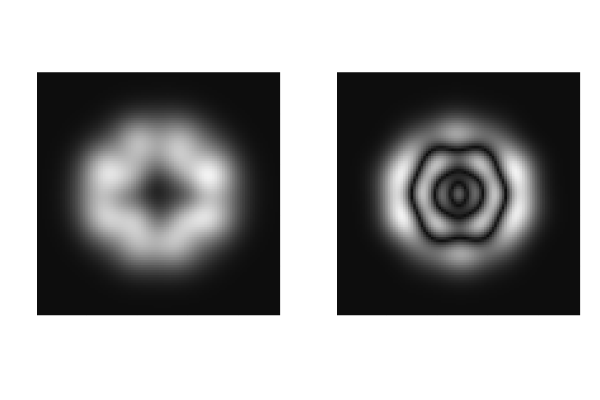

In [29]:
N=100; Ne=100; w=1.0; c=0.7*w; p=3; m=3; q=0.5
parity=2
pts=96
@time I, XI = PCsimulationIGsc(N,Ne,w,c,p,m,q,parity,pts);
absI=abs.(I)
absXI=abs.(XI)
absIGg=absI/maximum(absI)
absXIGg=absXI/maximum(absXI)

# Plots
p1=heatmap((absIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
p2=heatmap((absXIGg)', aspect_ratio=1, colorbar=false, color=:grays, axis=:off) # plotlyjs
plot(p1, p2, layout=(1,2))